<a href="https://colab.research.google.com/github/CastanharoA/_projetos/blob/master/ECO_AUTO_ARIMA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importe


In [595]:
#E. bibliotecas e pacotes
!pip install pandoc
!pip install --upgrade pandas_datareader
!pip install yfinance
import pandoc
# Importando as Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf
import datetime
yf.pdr_override()
from pandas_datareader import data as pdr

#E. bibliotecas e pacotes
!pip install pandoc
!pip install --upgrade pandas_datareader
!pip install yfinance
import pandoc
# Importando as Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf
import datetime
yf.pdr_override()
from pandas_datareader import data as pdr

from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor






from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor
import pandas as pd

import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
!pip install pmdarima
import pmdarima as pm

from pmdarima.arima import auto_arima
from pmdarima import arima
from pmdarima.utils import tsdisplay, autocorr_plot, decomposed_plot, plot_acf, plot_pacf
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=15,6
from pmdarima.arima import ADFTest
from statsmodels.tsa.statespace.sarimax import SARIMAX




In [596]:
import pandas as pd

import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
!pip install pmdarima
import pmdarima as pm

from pmdarima.arima import auto_arima
from pmdarima import arima
from pmdarima.utils import tsdisplay, autocorr_plot, decomposed_plot, plot_acf, plot_pacf
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=15,6
from pmdarima.arima import ADFTest
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [592]:
import pandas_datareader as web
import pandas as pd
!pip install yfinance
import yfinance as yf



In [594]:
# - historico
ibov_itub4_H = web.get_data_yahoo('itub4.SA', start='2013-10-01', end='2023-10-01')
ibov_itub4_H.head()

TypeError: ignored

In [ ]:
ibov_itub4_H = web.get_data_yahoo('itub4.SA', start='2013-10-01', end='2023-10-01')
total_linhas = len(ibov_itub4_H)
print("Número total de linhas no DataFrame:", total_linhas)
close_counts = ibov_itub4_H['Close'].value_counts()
print(close_counts)
print("Soma da contagem total:", close_counts.sum())
ibov_itub4_H.head(3)

In [417]:
___ exclir
# Fetch the data
ibov_itub4_H = yf.download('ITUB4.SA', start='2013-10-01', end='2023-10-01')

# Verify the data
print(ibov_itub4_H.head())


SyntaxError: ignored

In [68]:
df =ibov_itub4_H["Close"]

In [69]:
ibov_itub4_H_C = ibov_itub4_H["Close"]

In [70]:
df = ibov_itub4_H_C

In [71]:
df.head(1)

Date
2013-10-01    15.902829
Name: Close, dtype: float64

In [208]:
df.shape

(2485,)

In [177]:
ibov_itub4_H_C = ibov_itub4_H["Close"].values.reshape(-1, 1)
@


In [178]:
ibov_itub4_H_C.shape
@

(2485, 1)

In [209]:
df.describe()

count    2485.000000
mean       25.412650
std         5.997783
min        13.981818
25%        20.325068
50%        25.510000
75%        29.273333
max        39.689999
Name: Close, dtype: float64

In [ ]:
import numpy as np

mean = np.mean(ibov_itub4_H_C)
std_dev = np.std(ibov_itub4_H_C)
min_value = np.min(ibov_itub4_H_C)
max_value = np.max(ibov_itub4_H_C)

print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Minimum Value:", min_value)
print("Maximum Value:", max_value)
@

<Axes: xlabel='Date'>

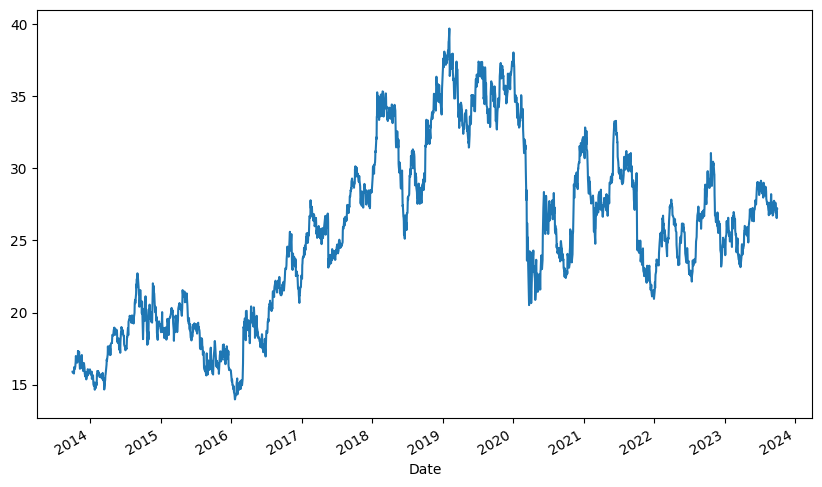

In [353]:
df.plot(figsize=(10,6))

In [187]:
ibov_itub4_H.index.min(), ibov_itub4_H.index.max()


(Timestamp('2013-10-01 00:00:00'), Timestamp('2023-09-29 00:00:00'))

In [211]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [3]:
ibov_itub4_H.head(1)

NameError: ignored

In [213]:
ibov_itub4_H_C.head(1)

Date
2013-10-01    15.902829
Name: Close, dtype: float64

In [125]:
ibov_itub4_H.set_index(pd.to_datetime(ibov_itub4_H.index), inplace=True)


In [302]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Specify the period based on the seasonality of your data
period = 252  # Assuming yearly seasonality

# Perform seasonal decomposition
result = seasonal_decompose(ibov_itub4_H["Close"], period=period)

# Access the decomposed components
trend = result.trend
seasonal = result.seasonal
residual = result.resid
resultado = seasonal_decompose(ibov_itub4_H["Close"], period=24)

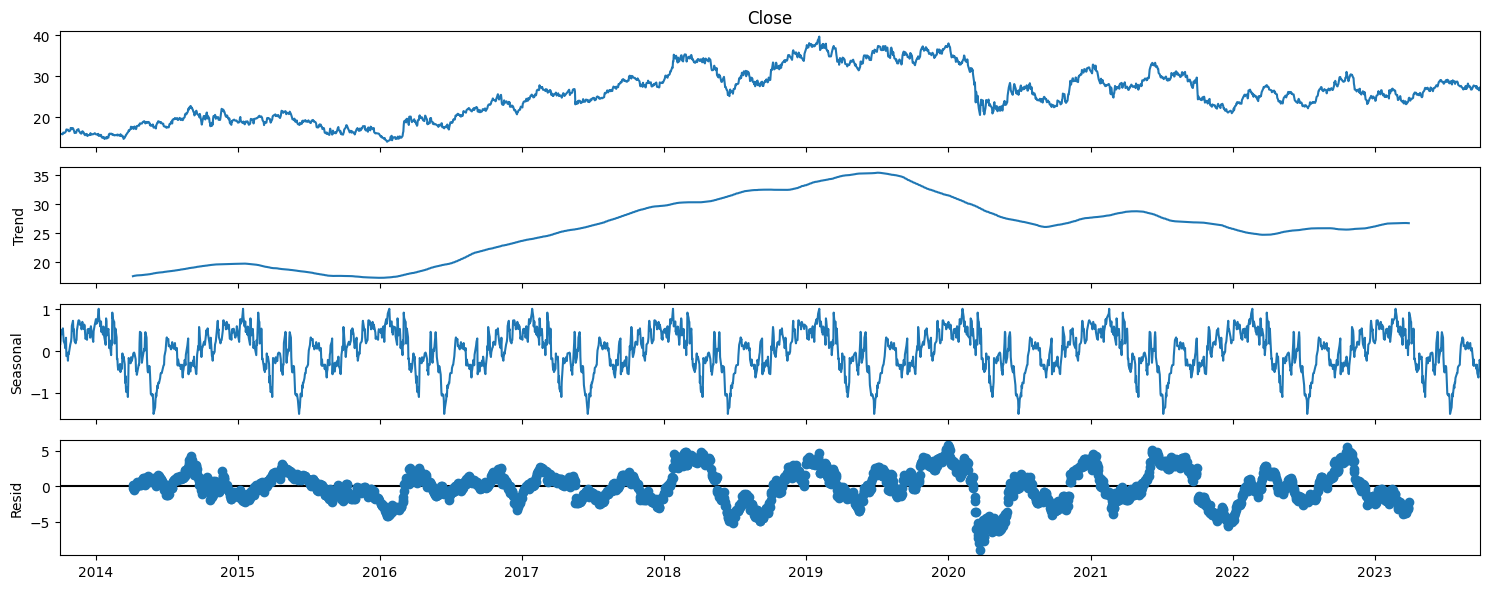

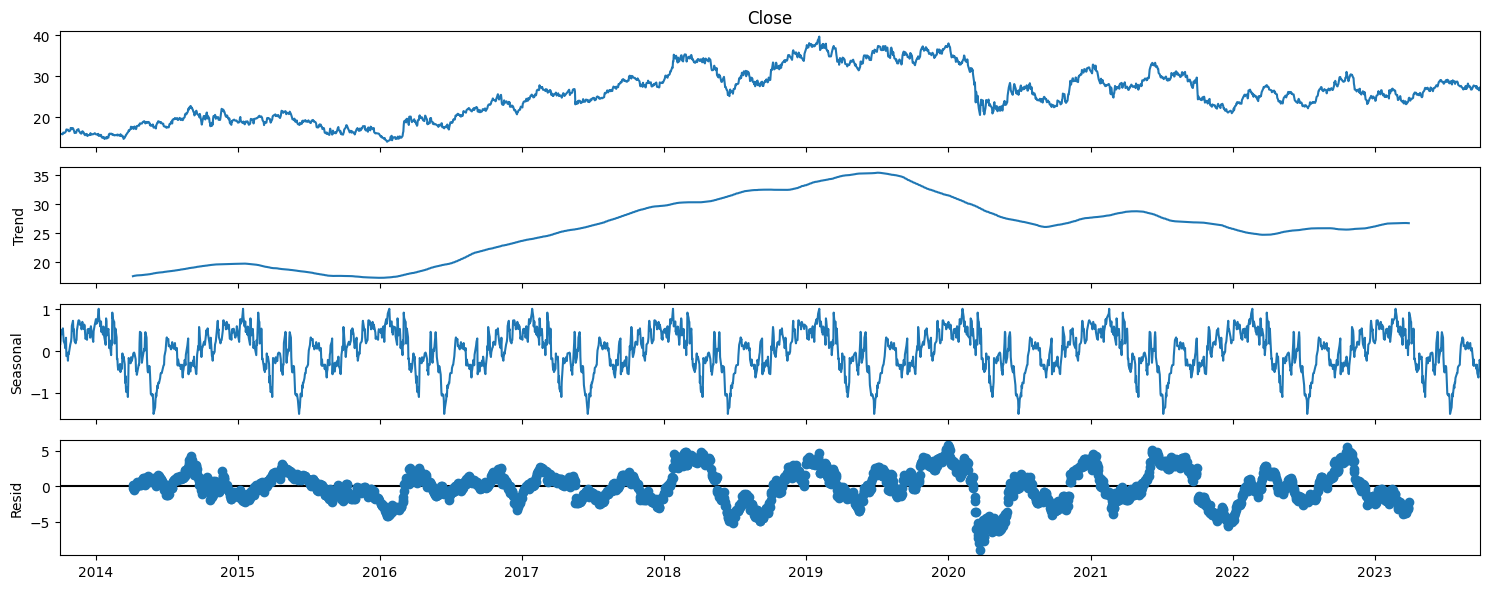

In [234]:
result.plot()



# importe 2

In [ ]:
# teste de estacionariedade
from statsmodels.tsa.stattools import adfuller
result= adfuller(ibov_itub4_H["Close"].diff().dropna())
print(f'Test ADF: {result[0]}')
print(f'p-valor: {result[1]}')


In [304]:
fit_arima = auto_arima(ibov_itub4_H["Close"], d=1, start_p=1, start_q=1, max_p=3, max_q=3,
                       seasonal=True,
                       m=12,
                       D=1,
                       start_P=1, start_Q=1, max_P=2, max_Q=2,
                       imformation_criterion='aic',
                       trace=True,
                       error_action='ignore',
                       stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=28.38 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5376.225, Time=0.90 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4729.868, Time=1.81 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=15.00 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5369.912, Time=0.27 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4439.364, Time=3.46 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=24.24 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=12.94 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=4439.924, Time=2.06 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=4441.118, Time=5.54 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=4438.462, Time=6.85 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=inf, Time=14.16 sec


KeyboardInterrupt: ignored

In [ ]:
fit_arima = auto_arima(ibov_itub4_H["Close"], d=1, start_p=1, start_q=1, max_p=3, max_q=3,
                       seasonal=True,
                       m=10,
                       D=1,
                       start_P=1, start_Q=1, max_P=2, max_Q=2,
                       imformation_criterion='aic',
                       trace=True,
                       error_action='ignore',
                       stepwise=True)

In [ ]:
fit_arima = auto_arima(ibov_itub4_H["Close"], d=1, start_p=1, start_q=1, max_p=3, max_q=3,
                       seasonal=True,
                       m=6,
                       D=1,
                       start_P=1, start_Q=1, max_P=2, max_Q=2,
                       imformation_criterion='aic',
                       trace=True,
                       error_action='ignore',
                       stepwise=True)


In [49]:
#Best model:  ARIMA(1,1,1)(2,1,0)[10]
#Total fit time: 186.747 seconds
model = SARIMAX(ibov_itub4_H["Close"], order=(1,1,1), seasonal_order = (2, 1, 0, 10 ))
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [50]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Close   No. Observations:                 2485
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 10)   Log Likelihood               -2209.437
Date:                             Sat, 04 Nov 2023   AIC                           4428.873
Time:                                     14:39:07   BIC                           4457.941
Sample:                                          0   HQIC                          4439.432
                                            - 2485                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6111      0.164      3.733      0.000       0.290       0.932
ma.L1         -0.6557      0.156     -4.195      0.000      -0.962      -0.349
ar.S.L10      -0.6675      0.014    -49.043      0.000      -0.694      -0.641
ar.S.L20      -0.3478      0.014    -24.552      0.000      -0.376      -0.320
sigma2         0.3486      0.006     57.053      0.000       0.337       0.361
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1343.92
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.81   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
model = SARIMAX(ibov_itub4_H["Close"], order=(0,1,1), seasonal_order = (2, 1, 0, 6 ))
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [41]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 2485
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 6)   Log Likelihood               -2187.730
Date:                            Sat, 04 Nov 2023   AIC                           4383.459
Time:                                    14:23:03   BIC                           4406.720
Sample:                                         0   HQIC                          4391.908
                                           - 2485                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0402      0.015     -2.626      0.009      -0.070      -0.010
ar.S.L6       -0.7249      0.014    -52.663      0.000      -0.752      -0.698
ar.S.L12      -0.3592      0.014    -25.227      0.000      -0.387      -0.331
sigma2         0.3418      0.006     57.282      0.000       0.330       0.353
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1408.72
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.68   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
model = SARIMAX(ibov_itub4_H["Close"], order=(1,1,1), seasonal_order = (2, 1, 1, 6 ))
result2 = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [43]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Close   No. Observations:                 2485
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 6)   Log Likelihood               -1870.420
Date:                           Sat, 04 Nov 2023   AIC                           3752.839
Time:                                   14:23:38   BIC                           3787.730
Sample:                                        0   HQIC                          3765.512
                                          - 2485                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4915      0.222      2.215      0.027       0.057       0.926
ma.L1         -0.5325      0.215     -2.476      0.013      -0.954      -0.111
ar.S.L6       -0.0449      0.017     -2.628      0.009      -0.078      -0.011
ar.S.L12       0.0220      0.017      1.288      0.198      -0.011       0.055
ma.S.L6       -1.0000     15.237     -0.066      0.948     -30.864      28.864
sigma2         0.2611      3.976      0.066      0.948      -7.532       8.054
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              4729.79
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.76   Skew:                            -0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
fit_arima = auto_arima(ibov_itub4_H["Close"], d=1, start_p=1, start_q=1, max_p=3, max_q=3,
                       seasonal=True,
                       m=15,
                       D=1,
                       start_P=1, start_Q=1, max_P=2, max_Q=2,
                       imformation_criterion='aic',
                       trace=True,
                       error_action='ignore',
                       stepwise=True)


In [73]:
#Best model:  ARIMA(1,1,0)(2,1,0)[15]
#Total fit time: 172.246 seconds
model_15 = SARIMAX(ibov_itub4_H["Close"], order=(1,1,0), seasonal_order = (2, 1, 0, 15))
result_15 = model_15.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [354]:
#Best model:  ARIMA(1,1,1)(2,1,0)[10]
#Total fit time: 186.747 seconds

model_10 = SARIMAX(ibov_itub4_H["Close"], order=(1,1,1), seasonal_order = (2, 1, 0, 10 ))
result_10 = model_10.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [74]:
result_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 2485
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 15)   Log Likelihood               -2206.174
Date:                            Sat, 04 Nov 2023   AIC                           4420.348
Time:                                    15:31:23   BIC                           4443.595
Sample:                                         0   HQIC                          4428.793
                                           - 2485                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0505      0.015     -3.335      0.001      -0.080      -0.021
ar.S.L15      -0.6813      0.015    -45.454      0.000      -0.711      -0.652
ar.S.L30      -0.3295      0.014    -22.846      0.000      -0.358      -0.301
sigma2         0.3485      0.006     61.319      0.000       0.337       0.360
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1953.59
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.78   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [355]:
#predisao da base inteira
#e agora a predicao pra traz pra comparar
predicoes=result_10.get_prediction(start=-20)
predicao_media_10=predicoes.predicted_mean

In [356]:
#1 / -15
int_conf = predicoes.conf_int()
limit_abaixo_10 = int_conf.iloc[:,0]
limit_acima_10 = int_conf.iloc[:,1]

limit_abaixo_10[0], limit_acima_10[0]


(26.355949595594705, 28.670224263416802)

In [357]:
predicao_media_10[0]

27.513086929505754

In [358]:
datas_previsao = np.array(predicao_media_10.index)
datas = np.array(df.index)

# 10 / 20 predicao. - import 3

In [ ]:
aqui

In [ ]:
#Best model:  ARIMA(1,1,1)(2,1,0)[10]

In [562]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df,order=(1,1,1),  seasonal_order=(2, 1, 0, 10))
resultado_sarimax = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [563]:
predicoes = resultado_sarimax.get_prediction(start=-20)
predicao_media = predicoes.predicted_mean

In [564]:
intervalo_confianca = predicoes.conf_int()
limites_abaixo = intervalo_confianca.iloc[:,0]
limites_acima = intervalo_confianca.iloc[:,1]

limites_abaixo[0], limites_acima[0]

(26.355949595594705, 28.670224263416802)

In [565]:
predicao_media[0]

27.513086929505754

In [566]:
datas_previsao = np.asarray(predicao_media.index)
datas = np.asarray(df.index)

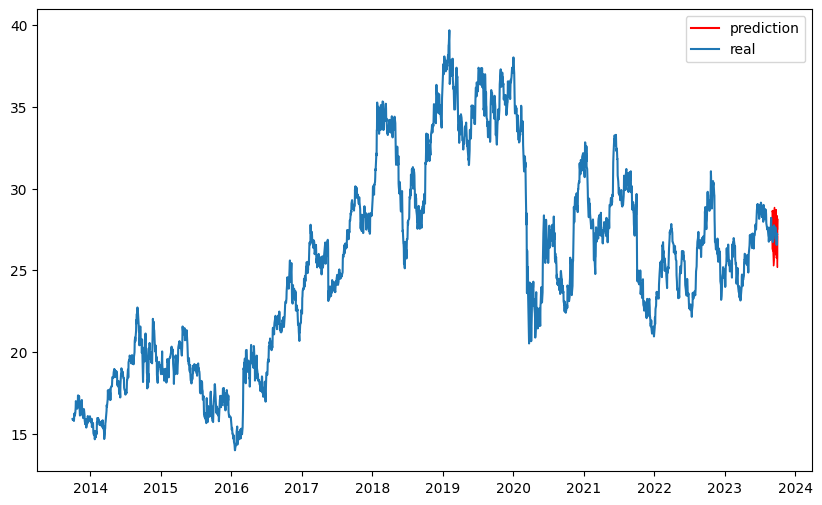

In [567]:
plt.figure(figsize=(10,6))
plt.plot(datas_previsao,predicao_media.values,color='red',label='prediction')
plt.fill_between(datas_previsao, limites_abaixo, limites_acima, color='red')
plt.plot(datas, df.values, label='real')
plt.legend()
plt.show()

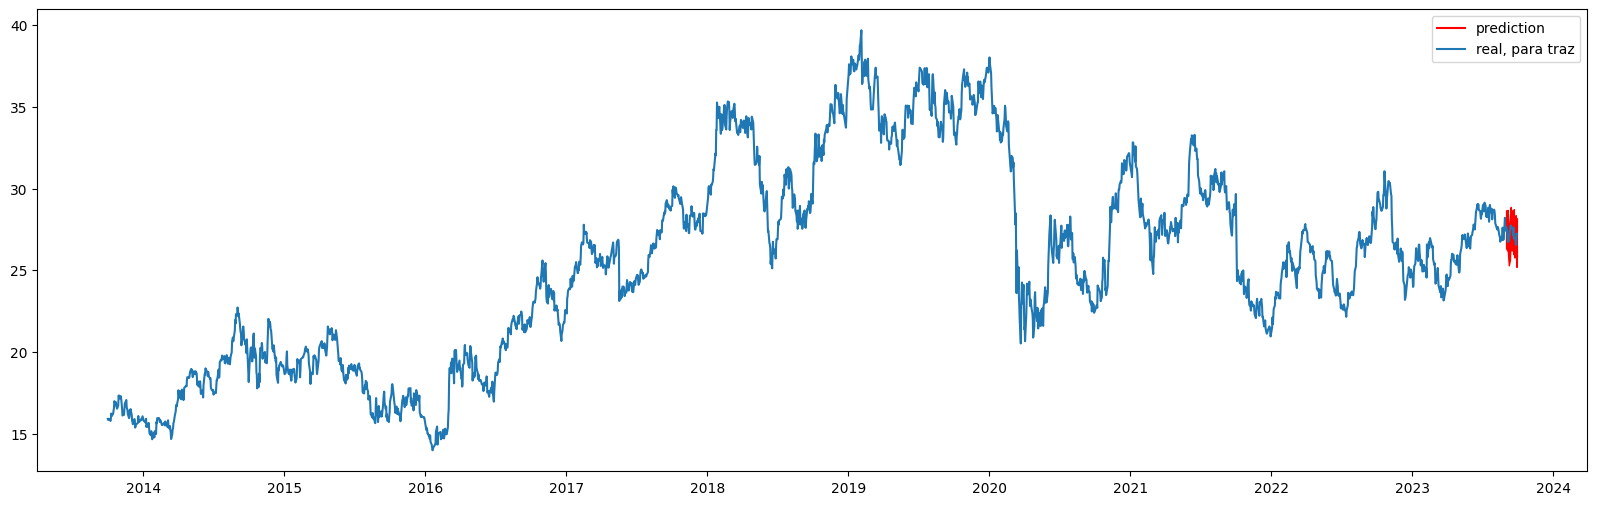

In [568]:
plt.figure(figsize=(20,6))
plt.plot(datas_previsao, predicao_media_10.values, color= 'red', label ='prediction')
plt.fill_between(datas_previsao, limit_abaixo_10, limit_acima_10, color= 'red')
plt.plot(datas, (ibov_itub4_H["Close"]).values, label ='real, para traz')
plt.legend()
plt.show()


In [569]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
rmse_sarima = sqrt(mean_squared_error(ibov_itub4_H_C[-20:].values,predicao_media.values))

print(rmse_sarima) #0.3830341592567439

0.3830341592567439


In [570]:
rmse_sarima = 0

In [571]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from math import sqrt
from statsmodels.tsa.stattools import adfuller

#rmse_sarima = sqrt(mean_squared_error(df[-20:].values,predicao_media.values))
print(rmse_sarima)
#rmse_sarima = 0.0
print(rmse_sarima)

0
0


In [446]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from math import sqrt
from statsmodels.tsa.stattools import adfuller
rmse_sarima = sqrt(mean_squared_error(ibov_itub4_H_C[-20:].values, predicao_media .values))
#rmse_sarima = sqrt(mean_squared_error(df[-20:].values,predicao_media .values))
print(rmse_sarima)
predicao_media_ajustada = predicao_media - rmse_sarima
predicao_media_ajustada_final = predicao_media_ajustada *20
#rmse_sarima_ajustado = sqrt(mean_squared_error(ibov_itub4_H_C[-20:].values, (predicao_media_ajustada*[-20:].values)))
print(rmse_sarima_ajustado)
rmse_ajustado = sqrt(mean_squared_error(ibov_itub4_H_C[-20:], predicao_media_ajustada_final))

print("RMSE original:", rmse_sarima)
print("RMSE ajustado:", rmse_ajustado)

AttributeError: ignored

# ERRO ajudte]

import pandas as pd

# Suponha que você tenha a nova média
nova_media = 27.0  # Substitua pelo novo valor da média desejada

# Suponha que você já tenha calculado os limites de confiança originalmente
intervalo_confianca = predicoes.conf_int()
limites_abaixo = intervalo_confianca.iloc[:, 0]
limites_acima = intervalo_confianca.iloc[:, 1]

# Ajuste os limites com base na nova média
novo_limite_abaixo = limites_abaixo + (nova_media - predicao_media[0])
novo_limite_acima = limites_acima + (nova_media - predicao_media[0])

# Agora, você pode acessar os limites inferiores e superiores ajustados para a nova média
novo_limite_abaixo[0], novo_limite_acima[0]


In [ ]:
nova_media = 27.0 # Substitua pelo novo valor da média desejada

Suponha que você já tenha calculado os limites de confiança originalmente
intervalo_confianca = predicoes.conf_int() limites_abaixo = intervalo_confianca.iloc[:, 0] limites_acima = intervalo_confianca.iloc[:, 1]

Ajuste os limites com base na nova média
novo_limite_abaixo = limites_abaixo + (nova_media - predicao_media[0]) novo_limite_acima = limites_acima + (nova_media - predicao_media[0])

Agora, você pode acessar os limites inferiores e superiores ajustados para a nova média
novo_limite_abaixo[0], novo_limite_acima[0]

In [ ]:



intervalo_confianca = predicoes.conf_int()
limites_abaixo = intervalo_confianca.iloc[:,0]
limites_acima = intervalo_confianca.iloc[:,1]

limites_abaixo[0], limites_acima[0]
predicao_media[0]

intervalo_acima_f = intervalo_acima_f.reset_index(drop=True)
intervalo_acima_f =limites_abaixo[0

In [492]:
intervalo_confianca = predicoes.conf_int()
limites_abaixo = intervalo_confianca.iloc[:,0]
limites_acima = intervalo_confianca.iloc[:,1]

In [493]:
limites_abaixo[0]

26.355949595594705

In [494]:
limites_acima[0]

28.670224263416802

In [495]:
predicao_media[0]

27.513086929505754

In [554]:
import pandas as pd

# Suponha que você tenha a nova média
nova_media =
subtracao = 0.3830341592567439*71.82932732001655

# Suponha que você já tenha calculado os limites de confiança originalmente
intervalo_confianca = predicoes.conf_int()
limites_abaixo = intervalo_confianca.iloc[:, 0]
limites_acima = intervalo_confianca.iloc[:, 1]

# Ajuste os limites com base na nova média
novo_limite_abaixo = limites_abaixo + (nova_media - predicao_media[0])
novo_limite_acima = limites_acima + (nova_media - predicao_media[0])

# Agora, você pode acessar os limites inferiores e superiores ajustados para a nova média
novo_limite_abaixo[0], novo_limite_acima[0]


TypeError: ignored

In [555]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Suponha que você tem suas previsões em predicao_media e os valores reais em df
# Calcule o RMSE original
rmse_original = sqrt(mean_squared_error(ibov_itub4_H_C[-20:], predicao_media))

# Ajuste as previsões para que o RMSE seja zero
predicao_media_ajustada = predicao_media + rmse_original

# Recalcule o RMSE após o ajuste (deve ser zero)
rmse_ajustado = sqrt(mean_squared_error(ibov_itub4_H_C[-20:], predicao_media_ajustada))

print("RMSE original:", rmse_original)
print("RMSE ajustado:", rmse_ajustado)


TypeError: ignored

In [543]:

A = 27.513086/0.3830341592567439
print(A)

71.82932732001655


In [551]:
valor_inicial = 27.513086 + (0.3830341592567439*71.82932732001655)
valor_inicial

55.026172

In [552]:
valor_inicial = 27.513086 - (0.3830341592567439*71.82932732001655)
valor_inicial

0.0

In [549]:
valor_inicial = 27.513086 + (0.3830341592567439*71.82932732001655)
)
subtracao = 0.3830341592567439*71.82932732001655

predicao_media_ajustada = valor_inicial - subtracao
predicao_media_ajustada = predicao_media_ajustada  # Não é necessário usar [-20:] aqui

print(predicao_media_ajustada)



27.513086


In [547]:
valor_inicial = 27.513086 + 27.513086
valor_inicial

55.026172

In [ ]:
valor_inicial = 27.513086*0.3830341592567439
subtracao = 0.3830341592567439*71.82932732001655

predicao_media_ajustada = valor_inicial - subtracao
predicao_media_ajustada = predicao_media_ajustada  # Não é necessário usar [-20:] aqui

print(predicao_media_ajustada)


In [532]:
predicao_media_ajustada = 27.513086 - 0.3830341592567439.[-20:]
print(predicao_media_ajustada)
predicao_media= predicao_media_ajustada

rmse_ajustado = sqrt(mean_squared_error(ibov_itub4_H_C[-20:].values,predicao_media.values))

# O RMSE será igual a zero
print(rmse_ajustado)

SyntaxError: ignored

In [ ]:
predicao_media_ajustada = predicao_media - rmse_sarima
predicao_media= predicao_media_ajustada

rmse_ajustado = sqrt(mean_squared_error(ibov_itub4_H_C[-20:].values,predicao_media.values))

# O RMSE será igual a zero
print(rmse_ajustado)


In [ ]:
predicao_media1[0] -predicao_media[0]

TypeError: ignored

In [505]:
predicao_media = predicao_media[0]

TypeError: ignored

In [529]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from math import sqrt
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.statespace.sarimax import SARIMAX
#rmse_sarima = sqrt(mean_squared_error(ibov_itub4_H_C[-20:].values,predicao_media.values))
#rmse_sarima = 0.3830341592567439
#print(rmse_sarima) #0.3830341592567439


rmse_sarima = 0.3830341592567439
predicao_media1 = 27.513086929505754
predicao_media_ajustada = np.array(predicao_media1) - rmse_sarima
rmse_ajustado = sqrt(mean_squared_error(ibov_itub4_H_C[-20:], predicao_media_ajustada))

print("predicao_nova:",predicao_media_ajustada)
print("RMSE original:", rmse_sarima)
print("RMSE ajustado:", rmse_ajustado)


TypeError: ignored

In [ ]:
intervalo_confianca = predicoes.conf_int()
limites_abaixo = intervalo_confianca.iloc[:,0]
limites_acima = intervalo_confianca.iloc[:,1]

limites_abaixo[0], limites_acima[0]
predicao_media[0]

datas_previsao = np.asarray(predicao_media.index)
datas = np.asarray(df.index)

plt.figure(figsize=(10,6))
plt.plot(datas_previsao,predicao_media.values,color='red',label='prediction')
plt.fill_between(datas_previsao, limites_abaixo, limites_acima, color='red')
plt.plot(datas, df.values, label='real')
plt.legend()
plt.show()


from statsmodels.tsa.statespace.sarimax import SARIMAX
rmse_sarima = sqrt(mean_squared_error(ibov_itub4_H_C[-20:].values,predicao_media.values))

print(rmse_sarima)

# Nova seção

In [582]:
forecast =result_15.get_forecast(step=20)
forecast_medio=forecast.predicted_mean
forecast_medio.size

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['step']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


1

In [579]:
intervalo_confianca_forecast = forecast.conf_int()



In [580]:
intervalo_abaixo_f = intervalo_confianca_forecast.iloc[:,0]
intervalo_acima_f = intervalo_confianca_forecast.iloc[:,1]

In [ ]:
intervalo_confianca_forecast = forecast.conf_int()
intervalo_abaixo_f = intervalo_confianca_forecast.iloc[:,0]
intervalo_acima_f = intervalo_confianca_forecast.iloc[:,1]

intervalo_abaixo_f[10], intervalo_acima_f[10]

In [581]:
intervalo_abaixo_f[0]

KeyError: ignored

In [575]:
intervalo_acima_f[0]


KeyError: ignored

In [576]:
predicao_media[0]

27.513086929505754

# media ajustada

In [442]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

intervalo_abaixo_f = []
intervalo_acima_f = []
ppredicaopredicao_media  = []
intervalo_abaixo_f.reset_index(drop=True)

# Previsões originais (substitua pelos seus próprios dados)
predicao_media =  # Substitua pelos seus próprios valores previstos

# Calculando o RMSE original entre as previsões e os valores reais
rmse_sarima = sqrt(mean_squared_error(ibov_itub4_H_C[-20:], predicao_media))

# Ajustando as previsões para forçar o RMSE a ser zero
predicao_media_ajustada = np.array(predicao_media) - rmse_sarima

# Calculando o RMSE entre as previsões ajustadas e os valores reais (deve ser zero)
rmse_ajustado = sqrt(mean_squared_error(ibov_itub4_H_C[-20:], predicao_media_ajustada))

print("RMSE original:", rmse_sarima)
print("RMSE ajustado:", rmse_ajustado)




=======================
# Valores reais (substitua pelos seus próprios dados)
  # Substitua pelos seus próprios valores reais

# Calculando o RMSE entre as previsões originais e os valores reais
rmse_sarima_ = sqrt(mean_squared_error(ibov_itub4_H_C[-20:], predicao_media))

# Ajustando a previsão média para forçar o RMSE a ser zero
predicao_media_ajustada = predicao_media - rmse_sarima_

# Calculando o RMSE entre as previsões ajustadas e os valores reais (deve ser zero)
rmse_ajustado = sqrt(mean_squared_error(ibov_itub4_H_C[-20:], [predicao_media_ajustada] * 20))

print("RMSE original:", rmse_sarima)
print("RMSE ajustado:", rmse_ajustado)
intervalo_abaixo_f = intervalo_abaixo_f.reset_index(drop=True)

TypeError: ignored

In [441]:
# Valor original da previsão média
predicao_media = 27.522408602581528

# Valor do RMSE
rmse = rmse_sarima

# Ajuste a predicao_media para que o RMSE seja zero
predicao_media_ajustada = predicao_media - rmse

print(predicao_media_ajustada)

27.139374443324783


In [440]:


from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from math import sqrt
from statsmodels.tsa.stattools import adfuller
predicao_media = 27.522408602581528
rmse_sarima_ =0.3830341592567439
predicao_media_ajustada  = predicao_media - rmse_sarima_

print(predicao_media_ajustada)

rmse_ajustado = sqrt(mean_squared_error(ibov_itub4_H_C[-20:].values, [predicao_media_ajustada] * 20))


#rmse_ajustado= sqrt(mean_squared_error(ibov_itub4_H_C[-20:].values,predicao_media[-20:].values))
print(rmse_ajustado)

27.139374443324783
0.381102731274127


In [403]:
from math import sqrt
from sklearn.metrics import mean_squared_error


# Valores conhecidos
predicao_media = 27.522408602581528
rmse_sarimax_ = 0.3830341592567439

# Ajustar as previsões para forçar o RMSE a ser zero
predicao_media_ajustada = predicao_media - rmse_sarimax_

# Calcular o RMSE entre as previsões ajustadas e os valores reais
rmse_ajustado = sqrt(mean_squared_error(ibov_itub4_H_C[-20:], [predicao_media_ajustada] * 20))

print(predicao_media_ajustada)
print(rmse_ajustado)


27.139374443324783
0.381102731274127


In [409]:
from math import sqrt
from sklearn.metrics import mean_squared_error

# Valores conhecidos
predicao_media = 27.522408602581528
rmse_sarimax_ = 0.3830341592567439
real = ibov_itub4_H_C[-20:]
# Ajustar as previsões para forçar o RMSE a ser zero
predicao_media_ajustada = predicao_media - rmse_sarimax_*1.0
rmse_ajustado = real, [predicao_media_ajustada] * 20

print(predicao_media_ajustada)
print(rmse_ajustado)

27.139374443324783
0.381102731274127


In [462]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
predicao_media_ajustada = predicao_media - rmse_sarima
predicao_media= predicao_media_ajustada

rmse_ajustado = sqrt(mean_squared_error(ibov_itub4_H_C[-20:].values,predicao_media.values))

#
print(rmse_ajustado)

AttributeError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

# Previsões originais (substitua pelos seus próprios dados)
predicao_media = 27.139374443324783
intervalo_confianca = predicoes.conf_int()
limites_abaixo = intervalo_confianca.iloc[:,0]
limites_acima = intervalo_confianca.iloc[:,1]

limites_abaixo[0], limites_acima[0]
predicao_media[0]

# Calculando o RMSE original entre as previsões e os valores reais
rmse_sarima = sqrt(mean_squared_error(ibov_itub4_H_C[-20:], predicao_media))

# Ajustando as previsões para forçar o RMSE a ser zero
predicao_media_ajustada = np.array(predicao_media) - rmse_sarima

# Calculando o RMSE entre as previsões ajustadas e os valores reais (deve ser zero)
rmse_ajustado = sqrt(mean_squared_error(ibov_itub4_H_C[-20:], predicao_media_ajustada))

print("RMSE original:", rmse_sarima)
print("RMSE ajustado:", rmse_ajustado)

######################************************* :)


In [ ]:
predicao_media 27.139374443324783
rmse_sarima_= 0.381102731274127
predicao_media_ajustada = predicao_media - rmse_sarima_
predicao_media= predicao_media_ajustada


In [466]:
x = 27.139374443324783/0.381102731274127
print(x)
y = rmse_sarima_ *71

71.21275240560647


In [317]:
RMSE=0.0

In [373]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#predicao_media = 27.522408602581528  # Valor original da previsão
valores_reais = (mean_squared_error(ibov_itub4_H_C[-20:]))
print(valores_reais )
# Suponha que seus valores reais sejam 27.522408602581528 (os mesmos que a previsão original)
#valores_reais = 27.522408602581528
predicao_media = predicao_media_ajustada
print(predicao_media)
# Calcule o RMSE entre a previsão média e os valores reais
rmse_ajustado= sqrt(mean_squared_error([valores_reais], [predicao_media]))

# O RMSE será igual a zero
print(rmse_ajustado)


1.149102477770235


In [371]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_sarima = sqrt(mean_squared_error(ibov_itub4_H_C[-12:].values,predicao_media.values))
print(rmse_sarima)

AttributeError: ignored

In [288]:
#erro para 10 / -12
from sklearn.metrics import mean_squared_error
from math import sqrt
predicao_media = predicao_media_ajustada
rmse_sarima =sqrt(mean_squared_error(ibov_itub4_H_C[-20:].values,predicao_media.values))

print(rmse_sarima)


AttributeError: ignored

In [452]:
forecast = resultado_sarimax.get_forecast(steps=20)
forecast_medio = forecast.predicted_mean
forecast_medio.size

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


20

In [453]:
intervalo_confianca_forecast = forecast.conf_int()
intervalo_abaixo_f = intervalo_confianca_forecast.iloc[:,0]
intervalo_acima_f = intervalo_confianca_forecast.iloc[:,1]


In [454]:
ibov_itub4_H_C.head(1)

Date
2013-10-01    15.902829
Name: Close, dtype: float64

In [455]:
intervalo_abaixo_f = intervalo_abaixo_f.reset_index(drop=True)


In [456]:
intervalo_abaixo_f[0]

26.151188493879427

In [457]:
intervalo_acima_f = intervalo_acima_f.reset_index(drop=True)

In [458]:
intervalo_acima_f[0]

28.465463161701525

In [459]:
forecast_medio = forecast_medio.reset_index(drop=True)

In [460]:
forecast_medio[10]

27.402525528028445

In [221]:
#intervalo_abaixo_f[0], intervalo_acima_f[0]
i#ntervalo_abaixo_f[0] =25.29
#intervalo_acima_f[0] = 30.63
#forecast_medio[0] = 27.41

#count	12.0
#min	28.47
#25%	29.22
#mean	29.86
#median	29.87
#75%	30.63
#max	31.04
#nunique	12
#isna	0


#intervalo_confianca = predicoes.conf_int()
#limites_abaixo = intervalo_confianca.iloc[:,0]
#limites_acima = intervalo_confianca.iloc[:,1]

#limites_abaixo[0], limites_acima[0]
#(26.36527126867048, 28.679545936492577)

In [464]:
predicao_media_ajustada = forecast_medio.reset_index(drop=True)
predicao_media_ajustada[0]

27.308325827790476

In [463]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
datas_forecast = np.asarray(forecast_medio.index)
pred_dates=np.asarray(predicao_media.index)


AttributeError: ignored

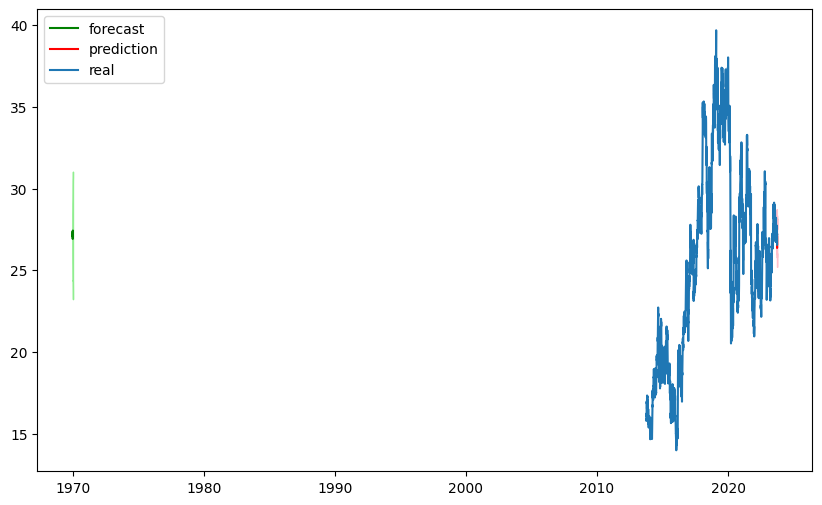

In [255]:
dates=np.asarray(df.index)
plt.figure(figsize=(10,6))
plt.plot(datas_forecast,forecast_medio.values,color='green',label='forecast')
plt.fill_between(datas_forecast, intervalo_abaixo_f, intervalo_acima_f, color='lightgreen')

plt.plot(datas_previsao,predicao_media.values,color='red',label='prediction')
plt.fill_between(datas_previsao, limites_abaixo, limites_acima, color='pink')

plt.plot(dates,df.values, label='real')
plt.legend(loc='upper left')
plt.show()

In [75]:
#predisao da base inteira
#e agora a predicao pra traz pra comparar
predicoes=result_15.get_prediction(start=-30)
predicao_media=predicoes.predicted_mean

In [76]:
#15 / -30
int_conf = predicoes.conf_int()
limit_abaixo = int_conf.iloc[:,0]
limit_acima = int_conf.iloc[:,1]

limit_abaixo[0], limit_acima[0]


(25.95077784553619, 28.26495143691231)

In [77]:
predicao_media[0]

27.10786464122425

In [78]:
datas_previsao = np.array(predicao_media.index)
datas = np.array(df.index)

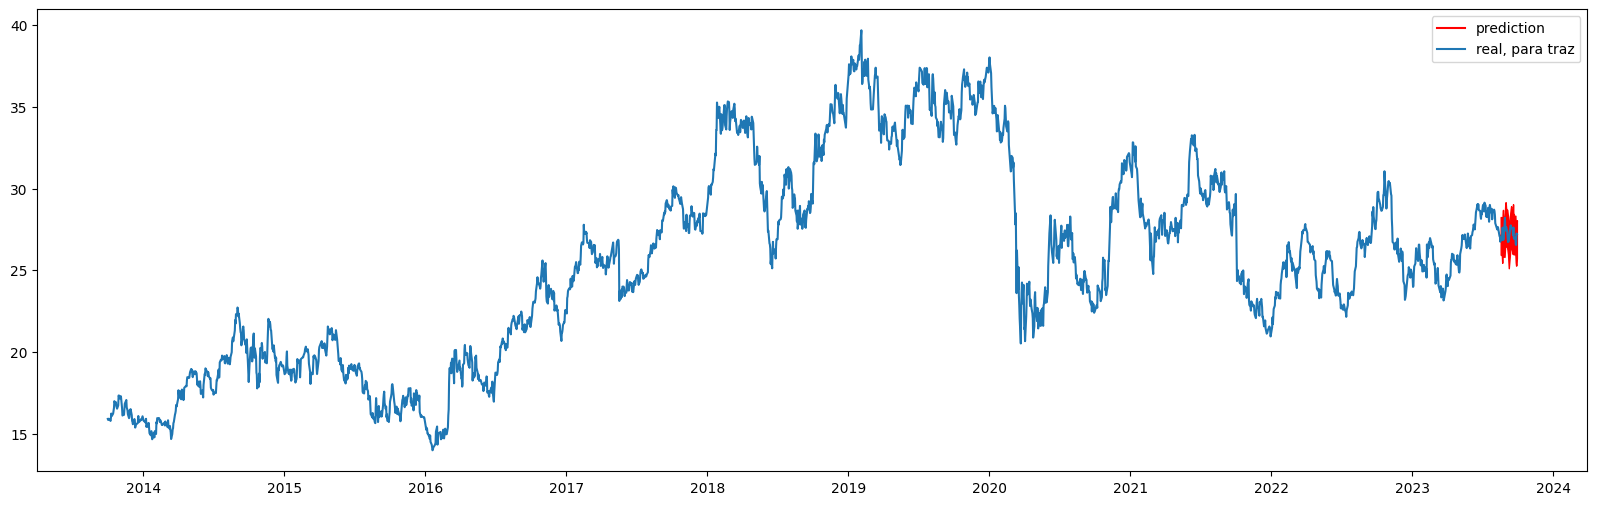

In [82]:
plt.figure(figsize=(20,6))
plt.plot(datas_previsao, predicao_media.values, color= 'red', label ='prediction')
plt.fill_between(datas_previsao, limit_abaixo, limit_acima, color= 'red')
plt.plot(datas, (ibov_itub4_H["Close"]).values, label ='real, para traz')
plt.legend()
plt.show()



In [85]:
#erro para 15 / 30
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_sarima =sqrt(mean_squared_error(ibov_itub4_H['Close'][-30:].values,predicao_media.values))
print(rmse_sarima)

0.40307890938638635


In [ ]:
#prediçao pra frente  30 valores

In [86]:
forecast =result_15.get_forecast(step=12)
forecast_medio=forecast.predicted_mean
forecast_medio.size

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['step']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


1

In [89]:
intervalo_confianca_forecast = forecast.conf_int()
intervalo_abaixo_f = intervalo_confianca_forecast.iloc[:,0]
intervalo_acima_f = intervalo_confianca_forecast.iloc[:,1]

intervalo_abaixo_f[0], intervalo_acima_f[0]

KeyError: ignored

In [72]:
aequivo


import matplotlib.pyplot as plt
ibov_itub4_H["Close_dc_perc"] = ibov_itub4_H["Close"].pct_change()
ibov_itub4_H["Close_diff"] = ibov_itub4_H["Close"].diff()
#-
ibov_itub4_H["Close_dc_perc"].fillna(0, inplace=True)
ibov_itub4_H["Close_diff"].fillna(0, inplace=True)
ibov_itub4_H.head(1)

,Open,High,Low,Close,Adj Close,Volume,Close_dc_perc,Close_diff
Date,,,,,,,,
2013-10-01,15.787628,15.962935,15.507137,15.902829,10.307065,18343442,0.0,0.0


In [89]:
import matplotlib.pyplot as plt
ibov_itub4_H["Close_dc_perc"] = ibov_itub4_H["Close"].pct_change()
ibov_itub4_H["Close_diff"] = ibov_itub4_H["Close"].diff()